# Exploratory Data Analysis

In [1]:
# Import statements:
import pandas as pd
import numpy as np

# Checking versions:
pd_version = pd.__version__
np_version = np.__version__
print(pd_version)
print(np_version)

2.2.0
1.26.3


## Loading data & running basic stats:

In [2]:
# Loading data:
df = pd.read_csv("/Users/rohitkandala/Desktop/UChicago/Academic Quarters/2023-24/Winter 2024/CAPP 30255/Project/okcupid_profiles.csv")

In [3]:
# Shape:
df.shape

(59946, 31)

In [4]:
# Summarize function for numerical variables:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [96]:
# Summary for categorical variables:
describe_output = df.describe(include="object").drop(columns=[
    "essay0", "essay1", "essay2", "essay3", "essay4", "essay5", "essay6", 
    "essay7", "essay8", "essay9", "last_online", "speaks", "ethnicity", 
    "location"])

# Dropping essays, last_online, speaks, location, ethnicity because there are 
# too many uniques:
describe_output

,status,sex,orientation,body_type,diet,drinks,drugs,education,job,offspring,pets,religion,sign,smokes
count,59946,59946,59946,54650,35551,56961,45866,53318,51748,24385,40025,39720,48890,54434
unique,5,2,3,12,18,6,3,32,21,15,15,45,48,5
top,single,m,straight,average,mostly anything,socially,never,graduated from college/university,other,doesn't have kids,likes dogs and likes cats,agnosticism,gemini and it&rsquo;s fun to think about,no
freq,55697,35829,51606,14652,16585,41780,37724,23959,7589,7560,14814,2724,1782,43896


In [101]:
# Extracting the number of unique entries for each object-type column:
unique_entries_dict_count = describe_output.loc['unique'].to_dict()

# Extracting the actual unique labels for each of those columns:
unique_entries_dict_labels = {
    col: df[col].unique().tolist() for col in df.columns if col in 
    unique_entries_dict_count.keys()}

{'status': ['single', 'available', 'seeing someone', 'married', 'unknown'],
 'sex': ['m', 'f'],
 'orientation': ['straight', 'bisexual', 'gay'],
 'body_type': ['a little extra',
  'average',
  'thin',
  'athletic',
  'fit',
  nan,
  'skinny',
  'curvy',
  'full figured',
  'jacked',
  'rather not say',
  'used up',
  'overweight'],
 'diet': ['strictly anything',
  'mostly other',
  'anything',
  'vegetarian',
  nan,
  'mostly anything',
  'mostly vegetarian',
  'strictly vegan',
  'strictly vegetarian',
  'mostly vegan',
  'strictly other',
  'mostly halal',
  'other',
  'vegan',
  'mostly kosher',
  'strictly halal',
  'halal',
  'strictly kosher',
  'kosher'],
 'drinks': ['socially',
  'often',
  'not at all',
  'rarely',
  nan,
  'very often',
  'desperately'],
 'drugs': ['never', 'sometimes', nan, 'often'],
 'education': ['working on college/university',
  'working on space camp',
  'graduated from masters program',
  'graduated from college/university',
  'working on two-year coll

In [6]:
# Check which columns have the least records:
df.isna().sum().sort_values(ascending=False)

offspring      35561
diet           24395
religion       20226
pets           19921
essay8         19225
drugs          14080
essay6         13771
essay9         12603
essay7         12451
essay3         11476
sign           11056
essay5         10850
essay4         10537
essay2          9638
job             8198
essay1          7572
education       6628
ethnicity       5680
smokes          5512
essay0          5488
body_type       5296
drinks          2985
speaks            50
height             3
status             0
location           0
last_online        0
income             0
orientation        0
sex                0
age                0
dtype: int64

## Analyzing Essay Questions

In [7]:
# Creating a dataframe with just the essays:
essays_df = df.loc[:, ["essay0", "essay1", "essay2", "essay3", "essay4", 
                   "essay5", "essay6", "essay7", "essay8", "essay9"]]

https://www.kaggle.com/datasets/andrewmvd/okcupid-profiles/discussion/183145

Ok--so these are what each essay prompt corresponds to. In order:

1. essay0- My self summary
2. essay1- What I’m doing with my life
3. essay2- I’m really good at
4. essay3- The first thing people usually notice about me
5. essay4- Favorite books, movies, show, music, and food
6. essay5- The six things I could never do without
7. essay6- I spend a lot of time thinking about
8. essay7- On a typical Friday night I am
9. essay8- The most private thing I am willing to admit
10. essay9- You should message me if...

I'm unsure about what *order* the essays come in, but they mostly follow the pattern that essay0 is the most popular, and the latter essays are less popular. Essay #9 is the least popular, but overall--most people filled out the essay questions!

In [8]:
# Check which essays are the most to least popular:
essays_df.isna().sum().sort_values(ascending=True)

essay0     5488
essay1     7572
essay2     9638
essay4    10537
essay5    10850
essay3    11476
essay7    12451
essay9    12603
essay6    13771
essay8    19225
dtype: int64

In [9]:
# Tokenize essays into words and count the number of words
word_counts = essays_df.apply(lambda x: x.str.split().str.len())

# Calculate the average number of words per essay
average_words_per_essay = word_counts.mean()
print(average_words_per_essay.sort_values(ascending=False))

essay0    116.222226
essay4     97.270335
essay1     46.203192
essay9     34.770969
essay2     26.689214
essay6     25.787071
essay7     21.035456
essay5     21.028801
essay8     20.176052
essay3     16.643883
dtype: float64


Essay #0 had significantly more words than the other essays, and is followed by essay #4, #1, and #9. Essay #8 continues to be on the "low" side of things. 

In [10]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def most_popular_words(df):
    """
    Calculates the ten most popular words in each essay column of the DataFrame, excluding stop words
    """
    top_ten_per_column = {}

    # Load stop words
    stop_words = set(stopwords.words('english'))

    for column in df.columns:
        word_freq = Counter()  # Counter to store word frequencies for each column

        # Iterate over each response in the column
        for response in df[column]:
            if isinstance(response, str):  # Check if the entry is a string
                # Tokenize the essay into words
                words = response.lower().split()  # Convert to lowercase and split into words

                # Update word frequency counts for the column, excluding stop words
                word_freq.update([word for word in words if word not in stop_words])

        # Extract top ten words for the column
        top_ten_words = [word for word, freq in word_freq.most_common(10)]

        # Add top ten words for the column to the dictionary
        top_ten_per_column[column] = top_ten_words

    return top_ten_per_column

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rohitkandala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
top_words_per_column = most_popular_words(essays_df)

for column, top_words in top_words_per_column.items():
    print(f"Top 10 words in {column}: {top_words}")

Top 10 words in essay0: ["i'm", 'love', 'like', 'new', 'good', 'people', 'life', 'enjoy', 'time', 'also']
Top 10 words in essay1: ["i'm", 'working', 'work', 'time', 'love', 'trying', 'like', 'new', 'life', 'also']
Top 10 words in essay2: ['good', "i'm", 'making', 'people', 'things', 'really', '-', 'like', 'also', 'love']
Top 10 words in essay3: ["i'm", 'people', 'smile', 'eyes', 'like', 'notice', 'really', 'look', 'hair', 'usually']
Top 10 words in essay4: ['love', 'like', "i'm", '-', 'anything', 'favorite', 'music', 'music:', 'movies:', 'books:']
Top 10 words in essay5: ['friends', 'family', '-', 'good', 'music', 'friends,', 'food', '1.', '2.', '3.']
Top 10 words in essay6: ["i'm", 'next', 'think', 'life', 'people', 'things', 'like', 'time', 'want', 'going']
Top 10 words in essay7: ['friends', 'home', 'watching', "i'm", 'going', 'friends,', 'dinner', 'friday', 'hanging', 'good']
Top 10 words in essay8: ["i'm", 'like', 'really', 'know', 'love', 'get', 'private', 'think', "i've", 'one']

## Correlation Analyses

### Understanding who's answering question #8:

In [75]:
# Creating a Series that sees those who answered essay_8. 0 if no & 1 if yes:
essay_8_boolean = essays_df['essay8'].notna().astype(int)

In [77]:
# Creating a series of categories to compare correlations:
non_essay_cols = [
    col for col in df.columns if not col.startswith("essay")]

# List for continuous columnns:
continuous_cols = [col for col in non_essay_cols if col in [
    "age", "height", "income"]]

# List for categorical colunns:
categorical_cols = [col for col in non_essay_cols if col not in [
    "age", "height", "income"]]

In [78]:
# Converting lists into dataframes:
non_essay_df = df[non_essay_cols]
continuous_df = df[continuous_cols]
categorical_df = df[categorical_cols]

In [79]:
# Print correlations between respondents who answered essay_8 and continuous
# variables:

correlation_list_continuous = []

for con_var in continuous_df.columns:
    correlation_list_continuous.append(
        essay_8_boolean.corr(continuous_df[con_var], 
                             method='pearson'))

# Printing list:
print(correlation_list_continuous)

[0.0363730599771233, 0.016010794179408885, 0.03320305599203689]


Respondents who answered essay_8 have a weak & positive linear correlation with age, height, and income. Generally speaking, there's a very small increase in those who answered essay_8, and how they tended to be older, taller, and richer. 

In [80]:
from scipy.stats import chi2_contingency

# Function to compare categorical variables:
def cramers_v(x, y):
    """
    Inputs:
        X: Categorical/Boolean variable
        Y: Categorical/Boolean variable
    
    Outputs:
        Returns: A correlation between correlation matrix. 
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)

    # Return statement:
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

In [86]:
# Print correlations between respondents who answered essay_8 and object data
# types:

correlation_list_categorical = []

for con_var in categorical_df.columns:
    correlation_score = cramers_v(essay_8_boolean, categorical_df[con_var])
    correlation_list_categorical.append((con_var, correlation_score))
    
# Printing list:
for column, score in correlation_list_categorical:
    print(f"{column}: {score}")

status: 0.05582845210945361
sex: 0.014148846518576076
orientation: 0.05478206517573968
body_type: 0.05256527271314355
diet: 0.09622184954802572
drinks: 0.03307676306348275
drugs: 0.0713473462986865
education: 0.06989546778653084
ethnicity: 0.07665725960355099
job: 0.05399734498456333
last_online: 0.20515683657947864
location: 0.0604623751724673
offspring: 0.09213969232277183
pets: 0.09445406443365598
religion: 0.15789225839975354
sign: 0.1317933255254718
smokes: 0.010300909088783335
speaks: 0.1133075939877583


Respondents who answered essay_8 are not generally that different from those who didn't answer the question. The only strong indication is the variable "last_online". There's a stronger, but ultimately, still weak correlation between those who are more online & those who are willing to answer essay_8. 

### Understanding relationship between categorical variables:

In [103]:
import itertools

variable_combinations = itertools.combinations(
    unique_entries_dict_count.keys(), 2)

cramers_v_results = {}

for var1, var2 in variable_combinations:
    correlation = cramers_v(df[var1], df[var2])
    cramers_v_results[(var1, var2)] = correlation

print(cramers_v_results)

{('status', 'sex'): 0.036045125360461706, ('status', 'orientation'): 0.14475945199774573, ('status', 'body_type'): 0.044493153090623065, ('status', 'diet'): 0.04023383175295507, ('status', 'drinks'): 0.025904264283140604, ('status', 'drugs'): 0.09165969993836941, ('status', 'education'): 0.04664245707230484, ('status', 'job'): 0.04679201733515939, ('status', 'offspring'): 0.10628538148236939, ('status', 'pets'): 0.062415635503658, ('status', 'religion'): 0.07420236463986112, ('status', 'sign'): 0.030082002231853387, ('status', 'smokes'): 0.009335259359367349, ('sex', 'orientation'): 0.1578066555060698, ('sex', 'body_type'): 0.4049798241743449, ('sex', 'diet'): 0.15229587653054405, ('sex', 'drinks'): 0.034075037766481124, ('sex', 'drugs'): 0.05671808128881579, ('sex', 'education'): 0.11815349140020451, ('sex', 'job'): 0.30273691905085787, ('sex', 'offspring'): 0.11937121225432433, ('sex', 'pets'): 0.18722687104948157, ('sex', 'religion'): 0.16507091245579172, ('sex', 'sign'): 0.13946720

In [105]:
# Prepping the cramer_v_results to be visualized:

# Extract unique variables involved in the correlations and convert 
# them to a list to preserve order:
variables = sorted(list(set([
    var for pair in cramers_v_results.keys() for var in pair])))

# Create an empty DataFrame for storing the results in matrix form, using the 
# sorted list of variables for index and columns:
cramers_v_matrix = pd.DataFrame(index=variables, columns=variables, data=np.nan)

# Populate the DataFrame with your Cramer's V results:
for (var1, var2), correlation in cramers_v_results.items():
    cramers_v_matrix.loc[var1, var2] = correlation
    cramers_v_matrix.loc[var2, var1] = correlation

# Fill the diagonal with 1s for self-correlation
np.fill_diagonal(cramers_v_matrix.values, 1)

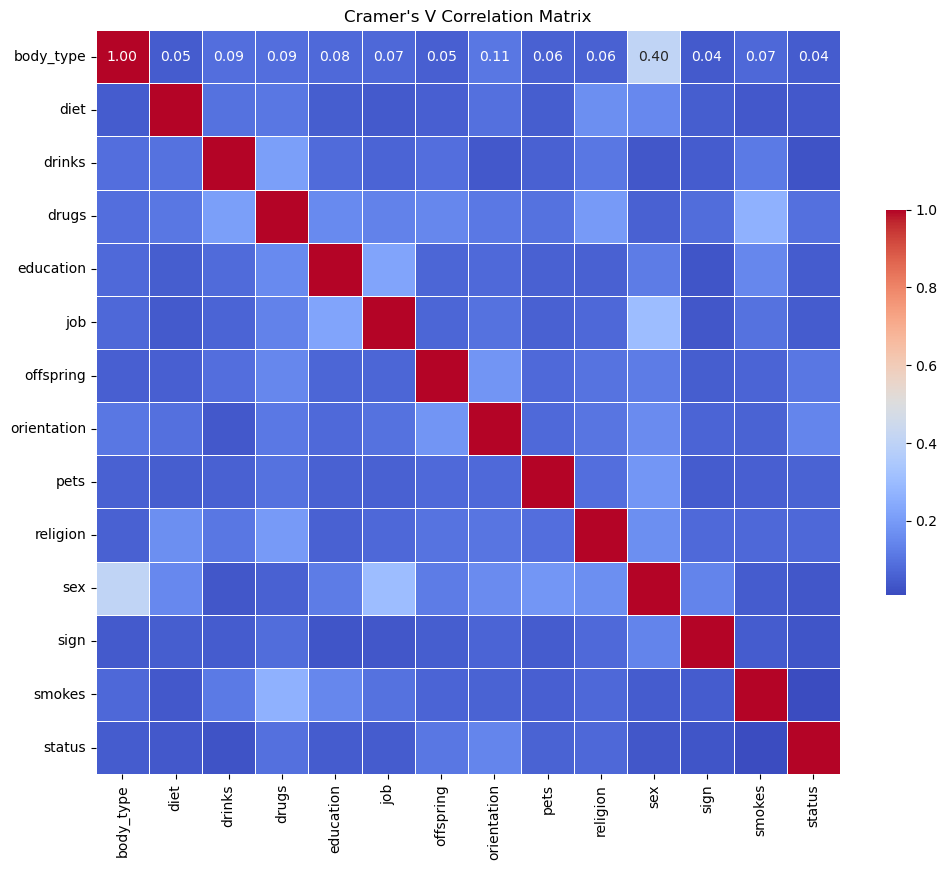

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title
plt.title('Cramer\'s V Correlation Matrix')

plt.show()